# IMPORT MODULES

In [19]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

In [20]:
! pip install h2o
! pip install lazypredict

In [21]:
import numpy as np
import pandas as pd
import os
import io
# import dill
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from scipy.stats import gaussian_kde, spearmanr, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.contingency import association
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 3, 3
sns.set(rc={'figure.figsize':(3,3)})
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error
# import chime
# chime.theme('mario')
np.random.seed(42)
from tqdm import trange
from IPython.display import Image
import h2o
from h2o.automl import H2OAutoML
from lazypredict.Supervised import LazyRegressor

In [22]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [23]:
os.getcwd()

'C:\\Users\\samgo\\OneDrive\\Perso\\Thèse\\Travaux\\SAM\\Illu\\Imb'

In [24]:
os.chdir('C:/Users/samgo/OneDrive/Perso/Thèse/Travaux/SAM/Illu/Imb')

In [25]:
Type = "Imb"
context = "supervised"
# retirer le stops et passer boucle à 20

In [26]:
# from google.colab import files
# uploaded = files.upload()

# DATA

In [27]:
n = 2000
if Type == "Imb":
  X1 = np.random.normal(0,1,n)
  X2 = np.random.normal(10,2,n)
  X3 = np.random.normal(10,2,n)
  data = pd.DataFrame(data={'X1': X1,'X2': X2,'X3': X3})

  data["Q1"] = np.random.choice(["Q1_70", "Q1_30"], n, p= [0.7,0.3])
  data["Q2"] = np.random.choice(["Q2_10", "Q2_20", "Q2_29", "Q2_31", "Q2_02", "Q2_08"], n, p= [0.1,0.2,0.3,0.3,0.02,0.08])
  data["Q3"] = np.random.choice(["Q3_60", "Q3_20", "Q3_17", "Q3_03"], n, p= [0.6,0.2,0.17,0.03])
  data["Q4"] = np.random.choice(["Q4_10_0", "Q4_10_1", "Q4_10_2", "Q4_10_3", "Q4_10_4", "Q4_15", "Q4_05", "Q4_30"], n, p= [0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.3])
  data["Q5"] = np.random.choice(["Q5_25_0", "Q5_25_1", "Q5_10_0", "Q5_10_1", "Q5_05_0", "Q5_05_1", "Q5_05_2", "Q5_05_3", "Q5_09", "Q5_01"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
  PL = (data["Q1"] =="Q1_30") * 0.1 + (data["Q2"] =="Q2_02") * 1 + (data["Q3"] =="Q3_03") * 1 + (data["Q4"] =="Q4_05") * 1 + (data["Q5"] =="Q5_01") * 1 + (data["Q5"] =="Q5_05_0") * 1 + X1*0.1 + X2*0.05 + X3*0.05
  data["Y"] = np.random.normal(PL,0.5,n)
  # data["Q5"] = np.random.choice(["Q51", "Q52", "Q53", "Q54", "Q55", "Q56"], n, p= [0.1,0.2,0.05,0.55,0.01,0.09])
  data
else:
  X1 = np.random.normal(0,1,n)
  X2 = np.random.normal(10,2,n)
  X3 = np.random.normal(10,2,n)
  data = pd.DataFrame(data={'X1': X1,'X2': X2,'X3': X3})

  data["Q1"] = np.random.choice(["Q1_70", "Q1_30"], n, p= [0.7,0.3])
  data["Q2"] = np.random.choice(["Q2_10", "Q2_20", "Q2_29", "Q2_31", "Q2_02", "Q2_08"], n, p= [0.1,0.2,0.3,0.3,0.02,0.08])
  data["Q3"] = np.random.choice(["Q3_60", "Q3_20", "Q3_17", "Q3_03"], n, p= [0.6,0.2,0.17,0.03])
  data["Q4"] = np.random.choice(["Q4_10_0", "Q4_10_1", "Q4_10_2", "Q4_10_3", "Q4_10_4", "Q4_15", "Q4_05", "Q4_30"], n, p= [0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.3])
  data["Q5"] = np.random.choice(["Q5_25_0", "Q5_25_1", "Q5_10_0", "Q5_10_1", "Q5_05_0", "Q5_05_1", "Q5_05_2", "Q5_05_3", "Q5_09", "Q5_01"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
  PL = (data["Q1"] =="Q1_70") * 1 + (data["Q2"] =="Q2_29") * 2 + (data["Q3"] =="Q3_60") * 1 + (data["Q4"] =="Q4_30") * 1 + (data["Q5"] =="Q5_25_0") * 3 + (data["Q5"] =="Q5_10_0") * 1 + X1*0.5 + X2*0.1 + X3*0.2
  data["Y"] = np.random.normal(PL,0.5,n)
  # data["Q5"] = np.random.choice(["Q51", "Q52", "Q53", "Q54", "Q55", "Q56"], n, p= [0.1,0.2,0.05,0.55,0.01,0.09])
  data

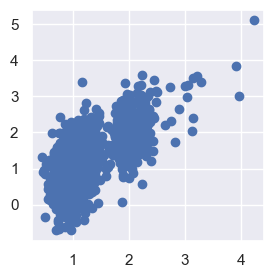

In [28]:
plt.scatter(PL,data['Y'])

In [29]:
# n = 2000
# X1 = np.random.normal(0,1,n)
# X2 = np.random.normal(10,2,n)
# X3 = np.random.normal(10,2,n)
# data = pd.DataFrame(data={'X1': X1,'X2': X2,'X3': X3})

# data["Q1"] = np.random.choice(["Q11", "Q12"], n, p= [0.7,0.3])
# data["Q2"] = np.random.choice(["Q21", "Q22", "Q23", "Q24", "Q25", "Q26"], n, p= [0.1,0.2,0.3,0.3,0.02,0.08])
# data["Q3"] = np.random.choice(["Q31", "Q32", "Q33", "Q34"], n, p= [0.6,0.2,0.17,0.03])
# data["Q4"] = np.random.choice(["Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48"], n, p= [0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.3])
# data["Q5"] = np.random.choice(["Q51", "Q52", "Q53", "Q54", "Q55", "Q56", "Q57", "Q58", "Q59", "Q599"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
# context = "NonSupervised"

In [30]:
# n = 2000
# data = pd.DataFrame({})
# data["Y"] = np.repeat(0,n)
# data["Q1"] = np.random.choice(["Q11", "Q12"], n, p= [0.7,0.3])
# data["Q2"] = np.random.choice(["Q21", "Q22", "Q23", "Q24", "Q25", "Q26"], n, p= [0.1,0.2,0.3,0.3,0.02,0.08])
# data["Q3"] = np.random.choice(["Q31", "Q32", "Q33", "Q34"], n, p= [0.6,0.2,0.17,0.03])
# data["Q4"] = np.random.choice(["Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48"], n, p= [0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.3])
# data["Q5"] = np.random.choice(["Q51", "Q52", "Q53", "Q54", "Q55", "Q56", "Q57", "Q58", "Q59", "Q599"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
# PL = (data["Q1"] =="Q12") * 1 + (data["Q2"] =="Q26") * 1 + (data["Q2"] =="Q25") * 2 + (data["Q3"] =="Q34") * 1.8 + (data["Q4"] =="Q47") * 1.3 + (data["Q5"] =="Q599") * 1.5
# data["Y"] = np.random.normal(PL,0.2,n)
# data
# context = "supervised"

In [31]:
# n = 2000
# data = pd.DataFrame({})
# data["Q1"] = np.random.choice(["Q11", "Q12"], n, p= [0.7,0.3])
# data["Q2"] = np.random.choice(["Q21", "Q22", "Q23", "Q24", "Q25", "Q26"], n, p= [0.1,0.2,0.3,0.3,0.02,0.08])
# data["Q3"] = np.random.choice(["Q31", "Q32", "Q33", "Q34"], n, p= [0.6,0.2,0.17,0.03])
# data["Q4"] = np.random.choice(["Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48"], n, p= [0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.3])
# data["Q5"] = np.random.choice(["Q51", "Q52", "Q53", "Q54", "Q55", "Q56", "Q57", "Q58", "Q59", "Q599"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
# data
# context = "NonSupervised"

In [32]:
# n = 2000
# data = pd.DataFrame({})
# data["Q1"] = np.random.choice(["Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q199"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
# data["Q2"] = np.random.choice(["Q21", "Q22", "Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q299"], n, p= [0.25,0.25,0.1,0.1,0.05,0.05,0.05,0.05,0.09,0.01])
# data
# context = "NonSupervised"

In [33]:
# plt.hist(data['Y'])

In [34]:
lab_Y = "Y"

(array([ 29., 191., 642., 632., 362., 106.,  30.,   7.,   0.,   1.]),
 array([-0.70808704, -0.12692196,  0.45424312,  1.0354082 ,  1.61657328,
         2.19773836,  2.77890344,  3.36006853,  3.94123361,  4.52239869,
         5.10356377]),
 <BarContainer object of 10 artists>)

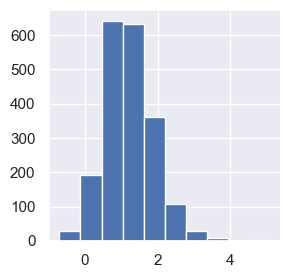

In [35]:
plt.hist(data[lab_Y])

réduction du jeu

In [36]:
for c in data.columns:
  if data[c].dtype == "object":
    print(data[c].value_counts(dropna=False))

Q1
Q1_70    1449
Q1_30     551
Name: count, dtype: int64
Q2
Q2_31    619
Q2_29    606
Q2_20    394
Q2_10    185
Q2_08    154
Q2_02     42
Name: count, dtype: int64
Q3
Q3_60    1221
Q3_20     370
Q3_17     336
Q3_03      73
Name: count, dtype: int64
Q4
Q4_30      613
Q4_15      287
Q4_10_0    213
Q4_10_4    212
Q4_10_1    200
Q4_10_2    192
Q4_10_3    181
Q4_05      102
Name: count, dtype: int64
Q5
Q5_25_1    485
Q5_25_0    469
Q5_10_0    225
Q5_10_1    209
Q5_09      190
Q5_05_1    110
Q5_05_0    102
Q5_05_3    100
Q5_05_2     89
Q5_01       21
Name: count, dtype: int64


### Importance Variable Analysis

In [37]:
y_rf = data[[lab_Y]]
X_rf = data.copy()
X_rf.drop(lab_Y, axis = 1, inplace=True)

In [38]:
X_rf=pd.get_dummies(X_rf)

In [39]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_rf, y_rf)

RandomForestRegressor()

In [40]:
res_imp = pd.DataFrame({'var' : X_rf.columns, 'imp':rf.feature_importances_})
res_imp.sort_values(by = "imp", ascending=False, inplace=True)
res_imp

,var,imp
2,X3,0.16
1,X2,0.14
0,X1,0.14
15,Q4_Q4_05,0.10
24,Q5_Q5_05_0,0.10
11,Q3_Q3_03,0.07
5,Q2_Q2_02,0.04
23,Q5_Q5_01,0.02
8,Q2_Q2_20,0.01
10,Q2_Q2_31,0.01


<BarContainer object of 10 artists>

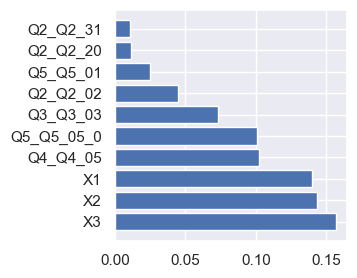

In [41]:
plt.barh(res_imp.iloc[0:10,0],res_imp.iloc[0:10,1])

# TRANSFORMER

In [42]:
def transformer(inputs, mode_quanti="MinMax", mode_quali="OHE"):
    res = []
    quanti = inputs.select_dtypes(include=['number'])
    quali = inputs.select_dtypes(include=['object', 'category'])
    name_quanti = quanti.columns
    if quanti.shape[1] > 0 :
      if mode_quanti=="MinMax" :
        scaler = MinMaxScaler()
        quanti_t = pd.DataFrame(scaler.fit_transform(quanti))
      else:
        scaler = StandardScaler()
        quanti_t = pd.DataFrame(scaler.fit_transform(quanti))
      quanti_t.columns = name_quanti
      quanti_t.index = inputs.index
      res = quanti_t
    if quali.shape[1] > 0 :
      quali_t = pd.get_dummies(quali)
      if mode_quali=="AFDM" :
        quali_t=(quali_t/np.sqrt(quali_t.mean()))
      if mode_quali=="DEN" :
        for col in quali.columns:
          num_modalities = quali[col].nunique()
          quali_t1 = quali_t.copy()
          quali_t1[quali_t1.columns[quali_t1.columns.str.startswith(col)]] = 1/(num_modalities-1)
        quali_t2=quali_t/quali_t.sum()
        quali_t = quali_t2 * quali_t1
        quali_t = np.sqrt(quali_t)
      if mode_quali=="SAM" :
        n = quali.shape[0]
        poids_1 = pd.DataFrame([])
        poids_0 = pd.DataFrame([])
        for col in quali.columns:
          temp = pd.DataFrame(1/(quali[col].value_counts(normalize=False).sort_index()))#/(np.max(1/(quali[col].value_counts(normalize=True).sort_index()))) )  #sum(1/quali[col].value_counts(normalize=True).sort_index()) * len(1/quali[col].value_counts(normalize=True).sort_index()))
          temp.columns=["fq"]
          poids_1 = pd.concat([poids_1,temp.transpose()], axis=1)
          temp = pd.DataFrame(1/(n - quali[col].value_counts(normalize=False).sort_index()))#/(np.max(1/(quali[col].value_counts(normalize=True).sort_index()))) )  #sum(1/quali[col].value_counts(normalize=True).sort_index()) * len(1/quali[col].value_counts(normalize=True).sort_index()))
          temp.columns=["fq"]
          poids_0 = pd.concat([poids_0,temp.transpose()], axis=1)
        poids_1 = np.sqrt(np.array(poids_1))
        poids_0 = np.sqrt(np.array(poids_0))
        quali_t = quali_t*poids_1 #+ (1-quali_t)*poids_0
      if mode_quali=="SAM-1" :
        poids = pd.DataFrame([])
        for col in quali.columns:
          mod_majo = quali[col].mode()[0]
          quali_t = quali_t[quali_t.columns[quali_t.columns != col+"_"+mod_majo]]
          temp = pd.DataFrame(1/quali[col].value_counts(normalize=True).sort_index())
          temp = temp[temp.index != mod_majo]
          temp = temp/temp.max()
          temp.columns=["fq"]
          temp = temp.transpose()
          poids=pd.concat([poids,temp], axis=1)
        poids = np.array(poids)
        quali_t = quali_t*np.sqrt(poids)
      if quanti.shape[1] > 0 :
        res = pd.concat([res, quali_t], axis=1)
      else:
        res = quali_t
    return res

In [43]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [44]:
def inv_transformer(inputs, outputs, mode_quanti="MinMax", mode_quali="OHE"):
  quanti = inputs.select_dtypes(include=['number'])
  quali = inputs.select_dtypes(include=['object', 'category'])
  name_quanti = quanti.columns
  if quanti.shape[1] > 0 :
    if mode_quanti=="MinMax" :
      scaler = MinMaxScaler()
      scaler.fit(quanti)
      res_quanti =  pd.DataFrame(scaler.inverse_transform(outputs[name_quanti]))
    elif mode_quanti=="SC" :
      scaler = StandardScaler()
      scaler.fit(quanti)
      res_quanti =  pd.DataFrame(scaler.inverse_transform(outputs[name_quanti]))
    else:
      res_quanti =  pd.DataFrame(outputs[name_quanti])
    res_quanti.columns = name_quanti
    res_quanti.index = inputs.index
  if quali.shape[1] > 0 :
    quali_t = pd.get_dummies(quali)
    name_quali_t = quali_t.columns
    res_quali = outputs.copy()
    res_quali.drop(name_quanti, axis=1, inplace=True)
    res_quali.index = quali_t.index
    if mode_quali=="AFDM" :
      res_quali=(res_quali) * np.sqrt(quali_t.mean())
    if mode_quali=="DEN" :
      for col in quali.columns:
        num_modalities = quali[col].nunique()
        quali_t1 = quali_t.copy()
        quali_t1[quali_t1.columns[quali_t1.columns.str.startswith(col)]] = 1/(num_modalities-1)
      quali_t2=quali_t/quali_t.sum()
      quali_t = quali_t2 * quali_t1
      res_quali = res_quali / np.sqrt(quali_t)
    if mode_quali=="SAM" :
        poids_1 = pd.DataFrame([])
        poids_0 = pd.DataFrame([])
        for col in quali.columns:
          temp = pd.DataFrame(1/(quali[col].value_counts(normalize=False).sort_index()))#/(np.max(1/(quali[col].value_counts(normalize=True).sort_index()))) )  #sum(1/quali[col].value_counts(normalize=True).sort_index()) * len(1/quali[col].value_counts(normalize=True).sort_index()))
          temp.columns=["fq"]
          poids_1 = pd.concat([poids_1,temp.transpose()], axis=1)
          temp = pd.DataFrame(1/(n - quali[col].value_counts(normalize=False).sort_index()))#/(np.max(1/(quali[col].value_counts(normalize=True).sort_index()))) )  #sum(1/quali[col].value_counts(normalize=True).sort_index()) * len(1/quali[col].value_counts(normalize=True).sort_index()))
          temp.columns=["fq"]
          poids_0 = pd.concat([poids_0,temp.transpose()], axis=1)
        poids_1 = np.sqrt(np.array(poids_1))
        poids_0 = np.sqrt(np.array(poids_0))
        # res_quali = (res_quali - poids_0)/(poids_1-poids_0)
        res_quali = res_quali/poids_1
    if mode_quali=="SAM-1" :
        poids = pd.DataFrame([])
        for col in quali.columns:
          mod_majo = quali[col].mode()[0]
          quali_t = quali_t[quali_t.columns[quali_t.columns != col+"_"+mod_majo]]
          temp = pd.DataFrame(1/quali[col].value_counts(normalize=True).sort_index())
          temp = temp[temp.index != mod_majo]
          temp = temp/temp.max()
          temp.columns=["fq"]
          temp = temp.transpose()
          poids=pd.concat([poids,temp], axis=1)
        poids = np.array(poids)
        res_quali = res_quali/np.sqrt(poids)
        for col in quali.columns:
          mod_majo = quali[col].mode()[0]
          temp = pd.DataFrame(1/quali[col].value_counts(normalize=True).sort_index())
          temp = temp[temp.index != mod_majo]
          temp = temp.index.to_list()
          temp = [col + "_" + mod for mod in temp]
          res_quali[col + "_" + mod_majo] = 1-np.sum(res_quali[temp],axis=1)
        res_quali = res_quali[name_quali_t]
    res_quali = np.round(res_quali,0)
    if quanti.shape[1] > 0 :
      res = pd.concat([res_quanti, res_quali], axis=1)
    else:
      res = res_quali
  return res

# Analyse DATA

In [45]:
# sns.pairplot(data)
# plt.show()

In [46]:
data.dtypes

X1    float64
X2    float64
X3    float64
Q1     object
Q2     object
Q3     object
Q4     object
Q5     object
Y     float64
dtype: object

In [47]:
colY = np.where(data.columns==lab_Y)[0][0] ; colY

8

# PARAMETRES

In [48]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
device

device(type='cuda')

In [49]:
load_models = 0

### Paramètres DATA

## Train-Test split

In [50]:
test_size=0.4

In [51]:
def trainTest(data, test_size=0.3,np_seed=None):
  if np_seed is None:
    np.random.seed()
  else:
    np.random.seed(np_seed)
  n = data.shape[0]
  X_test = data.sample(frac=test_size, random_state=np_seed)
  X_train = data.drop(X_test.index)
  data_t = np.array(data)
  return{'X_train':X_train,'X_test':X_test,'data_t':data_t}

In [52]:
seed_sample = np.random.randint(1000,size=1) # 683

In [53]:
split = trainTest(data,test_size,seed_sample)
X_train = split['X_train']
X_test = split['X_test']
print(X_train.shape)
print(X_test.shape)

(1200, 9)
(800, 9)


Retrait de Y de data

In [54]:
if context=="supervised":
  y_train = X_train.iloc[:,colY]
  X_train.drop(X_train.columns[colY], axis=1, inplace=True)

In [55]:
def stat_des(base,var):
    if (base[var].dtypes == "object"):
        freq = pd.value_counts(base[var],normalize=False)
        print(freq.sort_index())
    else:
        print(base[var].describe(include='all'))
        return "Analyse de " + var

In [56]:
for var in X_train.columns:
  stat_des(X_train,var)

count   1200.00
mean       0.05
std        0.98
min       -2.90
25%       -0.62
50%        0.04
75%        0.69
max        3.85
Name: X1, dtype: float64
count   1200.00
mean       9.95
std        2.02
min        3.96
25%        8.53
50%        9.95
75%       11.25
max       16.49
Name: X2, dtype: float64
count   1200.00
mean       9.86
std        2.01
min        3.65
25%        8.55
50%        9.90
75%       11.19
max       16.23
Name: X3, dtype: float64
Q1
Q1_30    333
Q1_70    867
Name: count, dtype: int64
Q2
Q2_02     22
Q2_08     93
Q2_10    114
Q2_20    219
Q2_29    348
Q2_31    404
Name: count, dtype: int64
Q3
Q3_03     39
Q3_17    190
Q3_20    232
Q3_60    739
Name: count, dtype: int64
Q4
Q4_05       66
Q4_10_0    138
Q4_10_1    109
Q4_10_2    120
Q4_10_3    106
Q4_10_4    128
Q4_15      163
Q4_30      370
Name: count, dtype: int64
Q5
Q5_01       14
Q5_05_0     49
Q5_05_1     72
Q5_05_2     43
Q5_05_3     59
Q5_09      116
Q5_10_0    145
Q5_10_1    129
Q5_25_0    277
Q5_25_1    

In [57]:
for var in X_test.columns:
  stat_des(X_test,var)

count   800.00
mean      0.04
std       1.00
min      -3.24
25%      -0.62
50%       0.06
75%       0.68
max       3.19
Name: X1, dtype: float64
count   800.00
mean     10.04
std       2.00
min       4.34
25%       8.68
50%      10.04
75%      11.39
max      17.85
Name: X2, dtype: float64
count   800.00
mean      9.97
std       1.98
min       4.20
25%       8.69
50%       9.96
75%      11.36
max      15.87
Name: X3, dtype: float64
Q1
Q1_30    218
Q1_70    582
Name: count, dtype: int64
Q2
Q2_02     20
Q2_08     61
Q2_10     71
Q2_20    175
Q2_29    258
Q2_31    215
Name: count, dtype: int64
Q3
Q3_03     34
Q3_17    146
Q3_20    138
Q3_60    482
Name: count, dtype: int64
Q4
Q4_05       36
Q4_10_0     75
Q4_10_1     91
Q4_10_2     72
Q4_10_3     75
Q4_10_4     84
Q4_15      124
Q4_30      243
Name: count, dtype: int64
Q5
Q5_01        7
Q5_05_0     53
Q5_05_1     38
Q5_05_2     46
Q5_05_3     41
Q5_09       74
Q5_10_0     80
Q5_10_1     80
Q5_25_0    192
Q5_25_1    189
Name: count, dtype: 

## Paramètres AE

In [58]:
encDim_S = 10
encDim_M = X_train.shape[1]
encDim_L = 20

hp_fae_w_corr = 1e-3
hp_fae_sparsity_factor =1e-4
hp_fae_sparsity_target=None
hp_fae_sparsity_mode=None
hp_fae_wNorm=False
hp_fae_mirror=False
hp_fae_encDim=encDim_S
hp_fae_epochs=1000
hp_fae_batch_size=128
hp_fae_lr=10e-4
#, BN_thr=0.05
hp_fae_lossfunc="wMSE"
hp_fae_dimHL=1
hp_fae_w_HGR=None
hp_fae_eps_kde=10e-4
hp_fae_w_Y = None

# ---------------------------- INDUSTRIALISATION

<!-- ## DEFINITION HGR -->

## DEFINITION AE

In [59]:
class FAE(nn.Module):
    def __init__(self, p,enc_dim,sparsity_factor,sparsity_target, dimHL=4, wNorm=False,#,threshold=None
                 mirror=False):
        super().__init__()
        torch.manual_seed(42)
        self.sparsity_factor = sparsity_factor
        self.sparsity_target = sparsity_target
        # self.threshold = threshold
        self.wNorm = wNorm
        self.mirror = mirror
        q = int(p/10)
        if dimHL==1:
            self.encoder = nn.Sequential(
                nn.Linear(p, dimHL*p),
                nn.Tanh(),
                nn.Linear(dimHL*p, dimHL*p-1*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-1*q, dimHL*p-2*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-2*q, dimHL*p-3*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-3*q, enc_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(enc_dim, dimHL*p-3*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-3*q, dimHL*p-2*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-2*q, dimHL*p-1*q),
                nn.Tanh(),
                nn.Linear(dimHL*p-1*q, dimHL*p),
                nn.Tanh(),
                nn.Linear(dimHL*p, p),
            )
        else:
            self.encoder = nn.Sequential(
                nn.Linear(p, dimHL*p),
                nn.Tanh(),
                nn.Linear(dimHL*p, (dimHL-1)*p),
                nn.Tanh(),
                nn.Linear((dimHL-1)*p, (dimHL-2)*p),
                nn.Tanh(),
                nn.Linear((dimHL-2)*p, (dimHL-3)*p),
                nn.Tanh(),
                nn.Linear((dimHL-3)*p, enc_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(enc_dim, (dimHL-3)*p),
                nn.Tanh(),
                nn.Linear((dimHL-3)*p, (dimHL-2)*p),
                nn.Tanh(),
                nn.Linear((dimHL-2)*p, (dimHL-1)*p),
                nn.Tanh(),
                nn.Linear((dimHL-1)*p, dimHL*p),
                nn.Tanh(),
                nn.Linear(dimHL*p, p),
            )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded


    def l1_regularization(self, inputs):
        activations = self.encoder(inputs).abs()
        sparsity_loss = torch.median(torch.median(activations, dim=0).values)
        return self.sparsity_factor * sparsity_loss

    def sparse_loss(self, inputs):
        model_children = list(self.encoder)
        sparsity_loss = 0
        values = inputs
        for i in range(len(model_children)):
            if isinstance(model_children[i], nn.Linear):
                values = torch.abs((model_children[i](values)))
                sparsity_loss += torch.median(torch.median(values, dim=0).values)
        return  self.sparsity_factor * sparsity_loss


def correlation_loss(x):
    correlation_matrix = torch.corrcoef(x.T)
    loss = torch.sum(torch.abs(correlation_matrix)) - torch.trace(correlation_matrix)
    return -loss

def weighted_mse_loss(inputs, target, weight_obs,weight_var=None,weight_var_1=None,weight_var_0=None,weight_varobs=None):
  if weight_var is None and weight_var_1 is None and weight_varobs is None:
    return torch.sum(weight_obs * (inputs.cpu() - target.cpu()).T ** 2)/weight_obs.sum()
  elif weight_var is None and weight_var_1 is not None:
    weight_var_1 = torch.FloatTensor(weight_var_1)
    weight_var_0 = torch.FloatTensor(weight_var_0)
    return torch.sum(weight_obs * (((inputs.cpu() - target.cpu())*target.cpu()*weight_var_1) ** 2).T)/weight_obs.sum() + torch.sum(weight_obs * (((inputs.cpu() - target.cpu())*(1-target.cpu())*weight_var_0) ** 2).T)/weight_obs.sum()
  elif weight_varobs is not None:
    weight_varobs = torch.FloatTensor(weight_varobs)
    # print("target : \n",target)
    # print("weight_varobs.shape : \n",weight_varobs.shape)
    # print("(inputs.cpu() - target.cpu()).shape : \n",(inputs.cpu() - target.cpu()).shape)
    return torch.sum(weight_varobs * (inputs.cpu() - target.cpu())** 2)
  else:
    weight_var = torch.FloatTensor(weight_var)
    return torch.sum((((inputs.cpu() - target.cpu())** 2)).sum(0) * weight_var)
    # weight_var = torch.FloatTensor(weight_var)#/weight_var.sum())
    # return torch.sum(((inputs.cpu() - target.cpu())*np.sqrt(weight_var)) ** 2)

# def weighted_mse_loss(inputs, target, weight_obs,weight_var=None):
#   if weight_var is None:
#     return torch.sum(weight_obs * (inputs.cpu() - target.cpu()).T ** 2)/weight_obs.sum()
#   else:https://colab.research.google.com/drive/1aCFcpnUp7Ozku4x9zOVEXfVKHkyOuBl7#scrollTo=PARAMETRES
#     weight_var = torch.FloatTensor(weight_var)#/weight_var.sum())
#     return torch.sum(weight_obs * ((inputs.cpu() - target.cpu())*weight_var).T ** 2)/weight_obs.sum()

## ENTRAINEMENT AE

In [60]:
def train_FAE(inputs,Y,w_corr = hp_fae_w_corr,sparsity_factor = hp_fae_sparsity_factor,sparsity_target=hp_fae_sparsity_target,sparsity_mode=hp_fae_sparsity_mode,
              wNorm=hp_fae_wNorm,mirror=hp_fae_mirror,encDim=hp_fae_encDim, epochs=hp_fae_epochs,batch_size=hp_fae_batch_size,lr=hp_fae_lr,
              lossfunc=hp_fae_lossfunc,dimHL=hp_fae_dimHL,w_HGR=hp_fae_w_HGR,eps_kde=hp_fae_eps_kde,Lin_HGR=False,w_Y=hp_fae_w_Y,red_MSE='sum', mode_quanti="MinMax", mode_quali="OHE"):

    if torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")
    print(device)

    quanti = inputs.select_dtypes(include=['number'])
    quali = inputs.select_dtypes(include=['object', 'category'])
    inputs_ori = inputs.copy()
    inputs = transformer(inputs, mode_quanti, mode_quali)
    quanti_df = transformer(quanti, mode_quanti, mode_quali)
    quali_df = transformer(quali, mode_quanti, mode_quali)
    inputs_df = inputs.copy()
    p=inputs.shape[1]
    n=inputs.shape[0]

    model = FAE(p,encDim,sparsity_factor,sparsity_target,wNorm=wNorm, mirror=mirror,dimHL=dimHL).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.0001)
    inputs=torch.FloatTensor(np.array(inputs)).to(device)
    batch_no = len(inputs) // batch_size
    res = []
    losses = []
    decod = []
    print("lossfunc =",lossfunc)
    if lossfunc == "L1loss":
      mseLoss = nn.L1Loss(reduction=red_MSE)
    elif lossfunc == "KLDivLoss":
      mseLoss = nn.KLDivLoss(reduction=red_MSE)
      print("coucou !!!!")
    else:
      mseLoss = nn.MSELoss(reduction=red_MSE)
    if w_corr is not None:
      losses_AE = []
      losses_corr = []
    train_loader = torch.utils.data.DataLoader(
        inputs,batch_size=batch_size,shuffle=True,generator= torch.Generator().manual_seed(42))
    if lossfunc=="wMSE" :
      w = 1/np.sum(inputs_df)
      w_res = []
      for col in inputs_ori.columns:
        temp = w[w.index[w.index.str.startswith(col)]]
        temp = temp/sum(temp)
        w_res = np.append(w_res,temp)
      w = np.array(w_res)
    if lossfunc=="wMSE_obs" :
      # ind_quali = np.isin(inputs_df.columns,quali_df.columns)
      w = 1/np.sum(quali_df)
      w_obs = quali_df * w
      w_res = []
      for col in quali.columns:
        col_temp = w_obs.columns[w_obs.columns.str.startswith(col)]
        temp = w_obs[col_temp].sum(axis=1) / len(col_temp)
        temp = np.repeat(temp[:, np.newaxis], len(col_temp), axis=1)
        if len(w_res) == 0:
          w_res = temp
        else:
          w_res = np.hstack((w_res, temp))
      w_ql = pd.DataFrame(w_res)
      w_ql.columns = quali_df.columns
      w_ql.index = quali_df.index
      w_qt = quanti_df*0+2/n
      w = pd.concat([w_qt,w_ql],axis=1)
      w=np.array(w[inputs_df.columns])
    if lossfunc=="wMSE_01" :
      w_1_ql = 1/(2*np.sum(quali_df))
      w_0_ql = 1/(2*(n-np.sum(quali_df)))
      w_1_qt = 0*np.sum(quanti_df)+2/n
      w_0_qt = 0*np.sum(quanti_df)+2/n
      w_0 = pd.concat([w_0_qt,w_0_ql])
      w_1 = pd.concat([w_1_qt,w_1_ql])
      w_0=w_0[inputs_df.columns]
      w_1=w_1[inputs_df.columns]
      for col in quali.columns:
          num_modalities = quali[col].nunique()
          w_1[w_1.index[w_1.index.str.startswith(col)]] = w_1[w_1.index[w_1.index.str.startswith(col)]]/num_modalities
          w_0[w_0.index[w_0.index.str.startswith(col)]] = w_0[w_0.index[w_0.index.str.startswith(col)]]/num_modalities
      w_1 = np.sqrt(w_1)
      w_0 = np.sqrt(w_0)
    for epoch in trange(epochs, desc="Proving P=NP", unit="carrots"):
        # for X in train_loader:
        for i in range(batch_no):
            start = i * batch_size
            end = start + batch_size
            X = inputs[start:end]
            # Output of Autoencoder
            decoded, encoded = model(X.to(device))
            if lossfunc=="wMSE" :
                loss = weighted_mse_loss(decoded,X,torch.FloatTensor(np.repeat(1,len(X))),weight_var=w).to(device)
            elif lossfunc=="wMSE_obs" :
                loss = weighted_mse_loss(decoded,X,torch.FloatTensor(np.repeat(1,len(X))),weight_varobs=w[start:end]).to(device)
            elif lossfunc=="wMSE_01" :
                loss = weighted_mse_loss(decoded,X,torch.FloatTensor(np.repeat(1,len(X))),weight_var_1=w_1,weight_var_0=w_0).to(device)
            else:
                loss = mseLoss(decoded,X)
            if sparsity_factor is not None:
                if sparsity_mode == "l1_regularization":
                    loss = loss + model.l1_regularization(X)
                elif sparsity_mode == "sparse_loss":
                    loss = loss + model.sparse_loss(X)
                elif sparsity_mode == "sparse_loss_l1reg":
                    loss = loss + model.sparse_loss(X) + model.l1_regularization(X)
            if w_corr is not None:
                loss_AE = loss
                loss_corr =  w_corr * correlation_loss(encoded) / (p*(p-1)/2)
                loss = loss + w_corr * correlation_loss(encoded) / (p*(p-1)/2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Storing the losses in a list for plotting
            losses.append(loss.cpu().detach().numpy()+0)
            if w_corr is not None:
              losses_AE.append(loss_AE.cpu().detach().numpy()+0)
              losses_corr.append(loss_corr.cpu().detach().numpy()+0)
            res.append((epoch, X, decoded))
        if np.mod(epoch,np.round(epochs/10))==0 :
          decoded, _ = model(inputs)
          decod.append(decoded.cpu().detach().numpy())
    decoded, encoded = model(inputs)
    eps = inputs - decoded
    if w_corr is not None:
      return {'model':model,'losses':losses,'res':res,'decoded':decoded,'encoded':encoded,
            'inputs':inputs,'losses_AE':losses_AE,'losses_corr':losses_corr,'epsilon':eps}
    elif lossfunc=="wMSE_obs" :
      return {'model':model,'losses':losses,'res':res,'decoded':decoded,'encoded':encoded,
              'inputs':inputs,'epsilon':eps, 'decod':decod, 'weight_varobs':w}
    else:
      return {'model':model,'losses':losses,'res':res,'decoded':decoded,'encoded':encoded,
              'inputs':inputs,'epsilon':eps, 'decod':decod}


------------------------------------

------------------------------

# MODEL TRAINING

In [61]:
load_models = 0

## Vanilla AE

### MSE

In [62]:
# mod_quali = 'OHE'
# train = transformer(X_train, mode_quali=mod_quali)
# train_t = np.array(train)
# VC(train)
# np.sum(train)

In [63]:
if load_models == 0:
    resAE = train_FAE(X_train, Y=colY, lossfunc="MSE",w_corr=None)
    res_vAE_OHE = resAE
    # mod_vAE_OHE = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

cuda


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
mod_quali = 'OHE'
decod = resAE['decod']
train = transformer(X_train, mode_quali=mod_quali)
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  # VC(X_hat_OHE)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k == 0:
    res = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))],axis=1)
res = res.sort_index(ascending=False)
res

In [ ]:
res_plot = res.T.copy()
res_plot.reset_index(inplace=True)
res_plot.drop('index', axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.lineplot(res_plot)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(res.div(res.max(axis=1), axis=0),cmap="RdYlGn_r", annot_kws={"size": 10})

In [ ]:
sns.heatmap(pd.DataFrame(np.sum(train_t_OHE)),cmap="RdYlGn")

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_OHE-train_t_OHE)**2))

In [ ]:
verif_OHE = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2)) ; verif_OHE

In [ ]:
  pd.DataFrame(np.sum(train_t_OHE))

In [ ]:
if load_models == 0:
  for k in range(X_train.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],np.array(train)[:,k])
      plt.show()

### L1Loss

In [ ]:
# mod_quali = 'OHE'
# train = transformer(X_train, mode_quali=mod_quali)
# train_t = np.array(train)
# VC(train)
# np.sum(train)

In [ ]:
if load_models == 0:
    resAE = train_FAE(X_train, Y=colY, lossfunc="L1loss",w_corr=None)
    res_vAE_L1 = resAE
    # mod_vAE_OHE = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
mod_quali = 'OHE'
decod = resAE['decod']
train = transformer(X_train, mode_quali=mod_quali)
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_L1 = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  # VC(X_hat_OHE)
  train_t_L1 = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k == 0:
    res = pd.DataFrame(np.sum((X_hat_L1-train_t_L1)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_L1-train_t_L1)**2))],axis=1)
res = res.sort_index(ascending=False)
res

In [ ]:
res_plot = res.T.copy()
res_plot.reset_index(inplace=True)
res_plot.drop('index', axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.lineplot(res_plot)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(res.div(res.max(axis=1), axis=0),cmap="RdYlGn_r", annot_kws={"size": 10})

In [ ]:
sns.heatmap(pd.DataFrame(np.sum(train_t_OHE)),cmap="RdYlGn")

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_L1 = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_L1 = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_L1-train_t_L1)**2))

In [ ]:
verif_L1 = pd.DataFrame(np.sum((X_hat_L1-train_t_L1)**2)) ; verif_L1

In [ ]:
  pd.DataFrame(np.sum(train_t_L1))

In [ ]:
if load_models == 0:
  for k in range(X_train.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],np.array(train)[:,k])
      plt.show()

### KLDivLoss

In [ ]:
# mod_quali = 'OHE'
# train = transformer(X_train, mode_quali=mod_quali)
# train_t = np.array(train)
# VC(train)
# np.sum(train)

In [ ]:
if load_models == 0:
    resAE = train_FAE(X_train, Y=colY, lossfunc="KLDivLoss",w_corr=None)
    res_vAE_KL = resAE
    # mod_vAE_OHE = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
mod_quali = 'OHE'
decod = resAE['decod']
train = transformer(X_train, mode_quali=mod_quali)
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_KL = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  # VC(X_hat_OHE)
  train_t_KL = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k == 0:
    res = pd.DataFrame(np.sum((X_hat_KL-train_t_KL)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_KL-train_t_KL)**2))],axis=1)
res = res.sort_index(ascending=False)
res

In [ ]:
res_plot = res.T.copy()
res_plot.reset_index(inplace=True)
res_plot.drop('index', axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.lineplot(res_plot)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(res.div(res.max(axis=1), axis=0),cmap="RdYlGn_r", annot_kws={"size": 10})

In [ ]:
sns.heatmap(pd.DataFrame(np.sum(train_t_KL)),cmap="RdYlGn")

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_KL = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_KL = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_KL-train_t_KL)**2))

In [ ]:
verif_KL= pd.DataFrame(np.sum((X_hat_KL-train_t_KL)**2)) ; verif_KL

In [ ]:
  pd.DataFrame(np.sum(train_t_KL))

In [ ]:
if load_models == 0:
  for k in range(X_train.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],np.array(train)[:,k])
      plt.show()

### SAM_01

In [ ]:
# mod_quali = 'OHE'
# train = transformer(X_train, mode_quali=mod_quali)
# train_t = np.array(train)
# # VC(train)
# pd.DataFrame(np.sum(train))
# # train.Q1_Q199.value_counts()

In [ ]:
# w = 1/np.sum(train) ; w

In [ ]:
# res = []
# for col in X_train.columns:
#   temp = w[w.index[w.index.str.startswith(col)]]
#   temp = temp/sum(temp)
#   res = np.append(res,temp)
# pd.DataFrame(res)

In [ ]:
# w = np.sqrt(np.array(res)) ; w

In [ ]:
# w = np.repeat(1,train.shape[1]);w

In [ ]:
if load_models == 0:
  resAE = train_FAE(X_train, Y=colY, lossfunc="wMSE_01",w_corr=None)#,w_Y=w)
  res_vAE_SAM01 = resAE
  # mod_vAE_SAM = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
mod_quali = 'SAM01'
decod = res_vAE_SAM01['decod']
train = transformer(X_train, mode_quali=mod_quali)
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_SAM01 = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  # VC(X_hat_SAM01)
  train_t_SAM01 = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k ==0:
    res = pd.DataFrame(np.sum((X_hat_SAM01-train_t_SAM01)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_SAM01-train_t_SAM01)**2))],axis=1)
res = res.sort_index(ascending=False)
res

In [ ]:
res_plot = res.T.copy()
res_plot.reset_index(inplace=True)
res_plot.drop('index', axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.lineplot(res_plot)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(res.div(res.max(axis=1), axis=0),cmap="RdYlGn_r", annot_kws={"size": 10})

In [ ]:
X_hat_SAM01

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_SAM01 = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_SAM01 = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_SAM01-train_t_SAM01)**2))

In [ ]:
verif_SAM = pd.DataFrame(np.sum((X_hat_SAM01-train_t_SAM01)**2)) ; verif_SAM

In [ ]:
if load_models == 0:
  for k in range(train.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],np.array(train)[:,k])
      plt.show()

# PREDICTION

## Initialization

In [ ]:
h2o.init()

In [ ]:
test_data = h2o.H2OFrame(X_test)
X_col = X_test.columns
y_col = X_test.columns[colY]
X_col = X_col.drop(y_col).tolist()

## Vanilla AE + MSE

In [ ]:
def pred(train_hat, X_train, y_train, test_data):
  if train_hat is not None:
    train_hat.columns = transformer(X_train).columns
    train_hat = inv_transformer(X_train,train_hat)
    train_hat = undummify(train_hat)
    train_hat.insert(0, data.columns[colY], y_train)
    train_hat = np.round(train_hat,10)
  else:
    train_hat = X_train.copy()
    train_hat.insert(0, data.columns[colY], y_train)
    # train_hat.columns = test_data.columns
  train_hat = h2o.H2OFrame(train_hat)
  aml = H2OAutoML(max_models=10, seed=42)
  aml.train(x=X_col, y=y_col, training_frame=train_hat)
  res_aml = aml.leaderboard
  preds = aml.predict(test_data)
  if test_data.as_data_frame().dtypes[colY]=="object":
    mse = mean_squared_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    mape = mean_absolute_percentage_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    mae = median_absolute_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    egm = np.prod(np.abs(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] - preds.as_data_frame().iloc[:,1:3]))**(1/test_data.shape[0])
  else:
    mse = mean_squared_error(preds.as_data_frame(),test_data[y_col].as_data_frame())
    mape = mean_absolute_percentage_error(preds.as_data_frame(),test_data[y_col].as_data_frame())
    mae = median_absolute_error(preds.as_data_frame(),test_data[y_col].as_data_frame())
    egm = np.prod(np.abs(preds.as_data_frame().to_numpy()-test_data[y_col].as_data_frame().to_numpy()))**(1/test_data.shape[0])
  return {"res_aml" : res_aml, "preds" : preds, "mse" : mse, 'mape':mape, 'mae':mae, 'egm':egm}

In [ ]:
train_hat = X_train.copy()
train_hat.insert(0, data.columns[colY], y_train)

In [ ]:
res_PredInit = pred(None,X_train,y_train,test_data)
res_PredInit['mse']

In [ ]:
Xhat = pd.DataFrame(res_vAE_OHE['decoded'].cpu().detach().numpy())
resPred_OHE = pred(Xhat,X_train,y_train,test_data)
resPred_OHE['mse']

## Vanilla AE + SAM

In [ ]:
Xhat = pd.DataFrame(res_vAE_SAM01['decoded'].cpu().detach().numpy())
resPred_SAM = pred(Xhat,X_train,y_train,test_data)
resPred_SAM['mse']

# PREDICTION - Latent

## Initialization

In [ ]:
h2o.init()

## Vanilla AE + MSE

In [ ]:
def pred_latent(res, y_train, test_data):
  model = res['model']
  ytest = test_data.iloc[:,colY]
  test_data = test_data.copy()
  test_data.drop(test_data.columns[colY], axis=1, inplace=True)
  test_data = model.encoder(torch.FloatTensor(np.array(transformer(test_data))).to(device))
  test_data = h2o.H2OFrame(test_data.cpu().detach().numpy())
  ytrain = y_train.copy()
  ytrain = ytrain.reset_index()
  ytrain.drop('index', axis=1, inplace=True)
  train_hat = res['encoded'].cpu().detach().numpy()
  np.insert(train_hat,0, ytrain, axis=1)
  train_hat = h2o.H2OFrame(train_hat)
  aml = H2OAutoML(max_models=10, seed=42)
  aml.train(x=train_hat.columns[1:], y=train_hat.columns[0], training_frame=train_hat)
  res_aml = aml.leaderboard
  preds = aml.predict(test_data)
  if test_data.as_data_frame().dtypes[colY]=="object":
    mse = mean_squared_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    mape = mean_absolute_percentage_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    mae = median_absolute_error(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] , preds.as_data_frame().iloc[:,1:3])
    egm = np.prod(np.abs(pd.get_dummies(test_data.as_data_frame()[y_col]).iloc[:,0:2] - preds.as_data_frame().iloc[:,1:3]))**(1/test_data.shape[0])
  else:
    mse = mean_squared_error(preds.as_data_frame(),ytest)
    mape = mean_absolute_percentage_error(preds.as_data_frame(),ytest)
    mae = median_absolute_error(preds.as_data_frame(),ytest)
    egm = np.prod(np.abs(preds.as_data_frame().to_numpy()-ytest.to_numpy()))**(1/test_data.shape[0])
  return {"res_aml" : res_aml, "preds" : preds, "mse" : mse, 'mape':mape, 'mae':mae, 'egm':egm}

In [ ]:
res_PredInit['mse']

In [ ]:
resPredLat_OHE = pred_latent(res_vAE_OHE, y_train, X_test)
resPredLat_OHE['mse']

## Vanilla AE + SAM

In [ ]:
resPredLat_SAM = pred_latent(res_vAE_SAM01, y_train, X_test)
resPredLat_SAM['mse']

In [ ]:
# stop

# CORRELATION ANALYSIS

In [ ]:
def mat_corr(data):
  p = data.shape[1]
  mat_corr = np.eye(p)
  for j in np.arange(p):
    for k in np.arange(j):
      if data.dtypes[j] == "object" and data.dtypes[k] == "object" :
        mat_corr[j,k] = association(pd.crosstab(data.iloc[:,j],data.iloc[:,k]), method="cramer")
      elif data.dtypes[j] != "object" and data.dtypes[k] != "object" :
        mat_corr[j,k] = spearmanr(data.iloc[:,j],data.iloc[:,k]).statistic
      else:
        mod = ols(data.columns[1]+ ' ~ '+ data.columns[3] , data=data).fit()
        anova = sm.stats.anova_lm(mod)
        mat_corr[j,k] = anova['sum_sq'][0] / (anova['sum_sq'][0] + anova['sum_sq'][1])
  mat_corr = pd.DataFrame(mat_corr)
  mat_corr[mat_corr.isna()]=0
  return mat_corr

In [ ]:
MC_X_init = mat_corr(X_train) ; MC_X_init

## Res MSE

In [ ]:
def mat_corr_AE(res):
  train_hat = pd.DataFrame(res['decoded'].cpu().detach().numpy())
  train_hat.columns = transformer(X_train).columns
  train_hat = inv_transformer(X_train,train_hat)
  train_hat = undummify(train_hat)
  return mat_corr(train_hat)

In [ ]:
MC_X_OHE=mat_corr_AE(res_vAE_OHE)
np.sum(np.abs(np.array(MC_X_OHE - MC_X_init)))

## Res SAM

In [ ]:
MC_X_SAM = mat_corr_AE(res_vAE_SAM01) ; MC_X_SAM

In [ ]:
np.sum(np.abs(np.array(MC_X_SAM - MC_X_init)))

In [ ]:
stop

# BOUCLE PREDICTION

à mettre en boucles imbriquéés

In [ ]:
n_simus=20

In [ ]:
seed_samples = []

In [ ]:
torch.manual_seed(torch.initial_seed())
np.random.seed()
if torch.cuda.is_available():
    torch.cuda.manual_seed(torch.initial_seed())
    torch.cuda.manual_seed_all(torch.initial_seed())

In [ ]:
X_train_l = []
X_test_l = []
res_MSE_l  =  []
res_MC_l  =  []
res_wMSE_l =  []
res_MAE_l  =  []
res_MAPE_l =  []
res_EGM_l  =  []
for simu in range(n_simus):
  print("============================     simu : ",simu,"          ======================")
  res_MSE  =  []
  res_MC  =  []
  res_wMSE =  []
  res_MAE  =  []
  res_MAPE =  []
  res_EGM  =  []

  #--------------- Sampling
  seed_sample = np.random.randint(1000,size=1)
  split = trainTest(data,test_size,seed_sample)
  X_train = split['X_train']
  X_test = split['X_test']
  if context=="supervised":
    y_train = X_train.iloc[:,colY]
    X_train.drop(X_train.columns[colY], axis=1, inplace=True)

  #--------------- model_training
  # Vanilla AE - MSE
  res_vAE_OHE = train_FAE(X_train, Y=colY, lossfunc="MSE",w_corr=None)
  # Vanilla AE - SAM01
  res_vAE_SAM01 = train_FAE(X_train, Y=colY, lossfunc="wMSE_01",w_corr=None)


  #--------------- Correlation
  MC_X_init = mat_corr(X_train)
  MC_X_OHE = mat_corr_AE(res_vAE_OHE)
  MC_X_SAM01 = mat_corr_AE(res_vAE_SAM01)

  #--------------- Prediction
  h2o.init()
  test_data = h2o.H2OFrame(X_test)
  X_col = X_test.columns
  y_col = X_test.columns[colY]
  X_col = X_col.drop(y_col).tolist()

  resPred_INIT = pred(None,X_train,y_train,test_data)
  Xhat = pd.DataFrame(res_vAE_OHE['decoded'].cpu().detach().numpy())
  resPred_OHE = pred(Xhat,X_train,y_train,test_data)
  Xhat = pd.DataFrame(res_vAE_SAM01['decoded'].cpu().detach().numpy())
  resPred_SAM01 = pred(Xhat,X_train,y_train,test_data)

  seed_samples.append(seed_sample)
# résultats
  res_MSE  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mse']]})
  res_MAE  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mae']]})
  res_MAPE =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mape']]})
  res_EGM  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['egm']]})
  res_MC   =  pd.DataFrame({'train':"Init",'run_'+str(simu):[np.sum(np.abs(np.array(MC_X_init - MC_X_init)))]})

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPred_OHE['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPred_OHE['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPred_OHE['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPred_OHE['egm']]}))
  res_MC   =  res_MC.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[np.sum(np.abs(np.array(MC_X_OHE - MC_X_init)))]}))

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPred_SAM01['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPred_SAM01['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPred_SAM01['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPred_SAM01['egm']]}))
  res_MC   =  res_MC.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[np.sum(np.abs(np.array(MC_X_SAM01 - MC_X_init)))]}))

  if len(res_MSE_l)==0:
    res_MSE_l  = res_MSE
    res_MAE_l  =  res_MAE
    res_MAPE_l =  res_MAPE
    res_EGM_l  =  res_EGM
    res_MC_l   =  res_MC
  else:
    res_MSE_l  = res_MSE_l.merge(res_MSE)
    res_MAE_l  = res_MAE_l.merge(res_MAE)
    res_MAPE_l = res_MAPE_l.merge(res_MAPE)
    res_EGM_l  = res_EGM_l.merge(res_EGM)
    res_MC_l   = res_MC_l.merge(res_MC)

res_MSE_l.set_index('train', inplace=True)
res_MAE_l.set_index('train', inplace=True)
res_MAPE_l.set_index('train', inplace=True)
res_EGM_l.set_index('train', inplace=True)
res_MC_l.set_index('train', inplace=True)

In [ ]:
seed_samples

In [ ]:
# 908,
# 898,
# 509,
# 378,
# 244,
# 490,
# 154,
# 841,
# 548,
# 933

In [ ]:
pd.DataFrame(res_MSE_l)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(res_MSE_l.transpose(), orient='h')

In [ ]:
res_MC_l

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(res_MC_l.transpose(), orient='h')

In [ ]:
sns.lineplot(res_MSE_l.transpose())

In [ ]:
pd.DataFrame(res_MAE_l)

In [ ]:
pd.DataFrame(res_EGM_l)

In [ ]:
pd.DataFrame(res_MAPE_l)

In [ ]:
# pd.DataFrame(res_MSE_l).to_csv(rep+'/Data/res_MSE_l.csv', index=False)

### Enregistrement

In [ ]:
seed_samples

In [ ]:
pd.DataFrame(seed_samples).to_csv(rep+'/seed_samples.csv', index=False)

In [ ]:
print("Phase 3 terminée")
# stop

In [ ]:
pd.DataFrame(res_MAE_l).to_csv(rep+'/res_MAE_l.csv', index=False)

In [ ]:
pd.DataFrame(res_EGM_l).to_csv(rep+'/res_EGM_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MAPE_l).to_csv(rep+'/res_MAPE_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MSE_l).to_csv(rep+'/res_MSE_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MC_l).to_csv(rep+'/res_MC_l.csv', index=False)

# BOUCLE PREDICTION-latent

à mettre en boucles imbriquéés

In [ ]:
# n_simus=10

In [ ]:
seed_samples = []

In [ ]:
torch.manual_seed(torch.initial_seed())
np.random.seed()
if torch.cuda.is_available():
    torch.cuda.manual_seed(torch.initial_seed())
    torch.cuda.manual_seed_all(torch.initial_seed())

In [ ]:
X_train_l = []
X_test_l = []
res_MSE_l  =  []
res_wMSE_l =  []
res_MAE_l  =  []
res_MAPE_l =  []
res_EGM_l  =  []
for simu in range(n_simus):
  print("============================     simu : ",simu,"          ======================")
  res_MSE  =  []
  res_wMSE =  []
  res_MAE  =  []
  res_MAPE =  []
  res_EGM  =  []

  #--------------- Sampling
  seed_sample = np.random.randint(1000,size=1)
  split = trainTest(data,test_size,seed_sample)
  X_train = split['X_train']
  X_test = split['X_test']
  if context=="supervised":
    y_train = X_train.iloc[:,colY]
    X_train.drop(X_train.columns[colY], axis=1, inplace=True)

  #--------------- model_training
  # Vanilla AE - MSE
  res_vAE_OHE = train_FAE(X_train, Y=colY, lossfunc="MSE",w_corr=None)
  # Vanilla AE - SAM
  res_vAE_SAM = train_FAE(X_train, Y=colY, lossfunc="wMSE",w_corr=None)
  # Vanilla AE - SAM01
  res_vAE_SAM01 = train_FAE(X_train, Y=colY, lossfunc="wMSE_01",w_corr=None)
  # Vanilla AE - SAM_OBS
  res_vAE_SAMOBS = train_FAE(X_train, Y=colY, lossfunc="wMSE_obs",w_corr=None)

  #--------------- Prediction
  h2o.init()
  resPred_INIT = pred(None,X_train,y_train,test_data)
  resPredLat_OHE = pred_latent(res_vAE_OHE, y_train, X_test)
  resPredLat_SAM = pred_latent(res_vAE_SAM, y_train, X_test)
  resPredLat_SAM01 = pred_latent(res_vAE_SAM01, y_train, X_test)
  resPredLat_SAMOBS = pred_latent(res_vAE_SAMOBS, y_train, X_test)

  print("seed_sample : ", seed_sample)
  seed_samples.append(seed_sample)
# résultats
  res_MSE  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mse']]})
  res_MAE  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mae']]})
  res_MAPE =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['mape']]})
  res_EGM  =  pd.DataFrame({'train':"Init",'run_'+str(simu):[resPred_INIT['egm']]})

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPredLat_OHE['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPredLat_OHE['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPredLat_OHE['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"OHE",'run_'+str(simu):[resPredLat_OHE['egm']]}))

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"SAM",'run_'+str(simu):[resPredLat_SAM['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"SAM",'run_'+str(simu):[resPredLat_SAM['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"SAM",'run_'+str(simu):[resPredLat_SAM['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"SAM",'run_'+str(simu):[resPredLat_SAM['egm']]}))

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPredLat_SAM01['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPredLat_SAM01['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPredLat_SAM01['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"SAM01",'run_'+str(simu):[resPredLat_SAM01['egm']]}))

  res_MSE  =  res_MSE.append(pd.DataFrame({'train':"SAMOBS",'run_'+str(simu):[resPredLat_SAMOBS['mse']]}))
  res_MAE  =  res_MAE.append(pd.DataFrame({'train':"SAMOBS",'run_'+str(simu):[resPredLat_SAMOBS['mae']]}))
  res_MAPE =  res_MAPE.append(pd.DataFrame({'train':"SAMOBS",'run_'+str(simu):[resPredLat_SAMOBS['mape']]}))
  res_EGM  =  res_EGM.append(pd.DataFrame({'train':"SAMOBS",'run_'+str(simu):[resPredLat_SAMOBS['egm']]}))

  if len(res_MSE_l)==0:
    res_MSE_l  = res_MSE
    res_MAE_l  =  res_MAE
    res_MAPE_l =  res_MAPE
    res_EGM_l  =  res_EGM
  else:
    res_MSE_l  = res_MSE_l.merge(res_MSE)
    res_MAE_l  = res_MAE_l.merge(res_MAE)
    res_MAPE_l = res_MAPE_l.merge(res_MAPE)
    res_EGM_l  = res_EGM_l.merge(res_EGM)

res_MSE_l.set_index('train', inplace=True)
res_MAE_l.set_index('train', inplace=True)
res_MAPE_l.set_index('train', inplace=True)
res_EGM_l.set_index('train', inplace=True)

In [ ]:
seed_samples

In [ ]:
# 908,
# 898,
# 509,
# 378,
# 244,
# 490,
# 154,
# 841,
# 548,
# 933

In [ ]:
pd.DataFrame(res_MSE_l)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(res_MSE_l.transpose(), orient='h')

In [ ]:
sns.lineplot(res_MSE_l.transpose())

In [ ]:
pd.DataFrame(res_MAE_l)

In [ ]:
pd.DataFrame(res_EGM_l)

In [ ]:
pd.DataFrame(res_MAPE_l)

In [ ]:
# pd.DataFrame(res_MSE_l).to_csv(rep+'/Data/res_MSE_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MAE_l).to_csv(rep+'/res_MAELatent_l.csv', index=False)

In [ ]:
pd.DataFrame(res_EGM_l).to_csv(rep+'/res_EGMLatent_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MAPE_l).to_csv(rep+'/res_MAPELatent_l.csv', index=False)

In [ ]:
pd.DataFrame(res_MSE_l).to_csv(rep+'/res_MSELatent_l.csv', index=False)

In [ ]:
pd.DataFrame(seed_samples).to_csv(rep+'/seed_samples_Lattent.csv', index=False)

In [ ]:
stop

### Enregistrement

# OLD

### AFDM

In [ ]:
mod_quali = 'AFDM'
train = transformer(X_train, mode_quali=mod_quali)
train_t = np.array(train)
pd.DataFrame(np.max(train))

In [ ]:
if load_models == 0:
  resAE = train_FAE(train_t, Y=colY, lossfunc="MSE",w_corr=None)
  # res_vAE_AFDM = resAE
  # mod_vAE_AFDM = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
decod = resAE['decod']
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k ==0:
    res = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))],axis=1)
res

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_OHE-train_t_OHE)**2))

In [ ]:
verif_AFDM = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2)) ; verif_AFDM

In [ ]:
if load_models == 0:
  for k in range(train_t.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],train_t[:,k])
      plt.show()

### SAM-1

In [ ]:
mod_quali = 'SAM-1'
train = transformer(X_train, mode_quali=mod_quali)
train_t = np.array(train)
pd.DataFrame(np.max(train))

In [ ]:
if load_models == 0:
  resAE = train_FAE(train_t, Y=colY, lossfunc="MSE",w_corr=None)
  res_vAE_SAM = resAE
  mod_vAE_SAM = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
decod = resAE['decod']
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k ==0:
    res = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))],axis=1)
res

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_OHE-train_t_OHE)**2))

In [ ]:
verif_SAM = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2)) ; verif_SAM

In [ ]:
if load_models == 0:
  for k in range(train_t.shape[1]):
      plt.clf()                                                                                                                                                                                          bn
      plt.scatter(X_hat[:,k],train_t[:,k])
      plt.show()

### DEN

In [ ]:
mod_quali = 'DEN'
train = transformer(X_train, mode_quali=mod_quali)
train_t = np.array(train)
pd.DataFrame(np.max(train))

In [ ]:
if load_models == 0:
  resAE = train_FAE(train_t, Y=colY, lossfunc="MSE",w_corr=None)
  res_vAE_SAM = resAE
  mod_vAE_SAM = resAE['model']
# else:
  # !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
  # mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
  # mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
decod = resAE['decod']
for k in range(len(decod)):
  X_hat = decod[k]
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  if k ==0:
    res = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))
  else:
    res = pd.concat([res,pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2))],axis=1)
res

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  df_X_hat = pd.DataFrame(X_hat)
  df_X_hat.columns = train.columns
  X_hat_OHE = inv_transformer(X_train,df_X_hat,mode_quanti=None,mode_quali=mod_quali)
  train_t_OHE = inv_transformer(X_train,train,mode_quanti=None,mode_quali=mod_quali)
  print("losses_min:",np.min(losses))
  print("MSE:")
  print(np.sum((X_hat_OHE-train_t_OHE)**2))

In [ ]:
verif_DEN = pd.DataFrame(np.sum((X_hat_OHE-train_t_OHE)**2)) ; verif_DEN

In [ ]:
if load_models == 0:
  for k in range(train_t.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],train_t[:,k])
      plt.show()

In [ ]:
print("Phase 1 terminée")
STOP

## Sparse AE

Sparse_loss + l1_regularization

stopssssstt### ### One-Hot Encoder

In [ ]:
if load_models == 0:
  resAE = train_FAE(X_train, Y=colY, sparsity_factor=hp_fae_sparsity_factor, sparsity_mode = "sparse_loss_l1reg", lossfunc="MSE",w_corr=None)
  res_sAE_MSE = resAE
  mod_sAE_MSE = resAE['model']
# else:
#   !gdown https://drive.google.com/uc?id={link_mod_sAE_MSE}
#   mod_sAE_MSE =   FAE(p=X_train.shape[1],enc_dim=hp_fae_encDim, sparsity_factor = hp_fae_sparsity_factor, sparsity_target=hp_fae_sparsity_target,dimHL=hp_fae_dimHL, wNorm=hp_fae_wNorm)
#   mod_sAE_MSE.load_state_dict(torch.load('mod_sAE_MSE.pt'))

In [ ]:
if load_models == 0:
  losses=resAE['losses']
  plt.clf()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.show()
  X_hat = resAE['decoded'].cpu().detach().numpy()
  print("losses_min:",np.min(losses))
  print("MSE:",np.mean((X_hat-X_train)**2))
  print("wMSE:",weighted_mse_loss(resAE['decoded'].cpu(), torch.FloatTensor(X_train),
                                  torch.FloatTensor(kdee)))

In [ ]:
if load_models == 0:
  for k in range(X_train.shape[1]):
      plt.clf()
      plt.scatter(X_hat[:,k],X_train[:,k])
      plt.show()

In [ ]:
if load_models == 0:
  latent_df=pd.DataFrame(resAE['encoded'].cpu().detach().numpy())
  plt.clf()
  #sns.pairplot(latent_df)
  plt.show()

In [ ]:
if load_models == 0:
  plt.clf()
  #sns.pairplot(pd.DataFrame(X_hat))
  plt.show()

In [ ]:
pd.DataFrame(np.corrcoef(X_hat))

In [ ]:
pd.DataFrame(np.corrcoef(X_train))

In [ ]:
pd.DataFrame(np.corrcoef(X_train)-np.corrcoef(X_hat))

In [ ]:
pd.DataFrame(np.corrcoef(X_train)-np.corrcoef(X_hat)).describe()

## Save Models

In [ ]:
if load_models == 0:
  model_save_name = 'mod_sAE_MSE.pt'
  path = rep+"/Models"+F"/{model_save_name}"
  torch.save(res_sAE_MSE['model'].state_dict(), path)
# else:


In [ ]:
if load_models == 0:
  model_save_name = 'mod_sAE_wMSE.pt'
  path = rep+"/Models"+F"/{model_save_name}"
  torch.save(res_sAE_wMSE['model'].state_dict(), path)

In [ ]:
if load_models == 0:
  df_data = pd.DataFrame(data)
  df_data.to_csv(rep+'/Data/df_data.csv', index=False)

  df_X_train = pd.DataFrame(X_train)
  df_X_train.to_csv(rep+'/Data/df_X_train.csv', index=False)

  df_X_test = pd.DataFrame(X_test)
  df_X_test.to_csv(rep+'/Data/df_X_test.csv', index=False)



In [ ]:
# if load_models == 0:
#   from google.colab import files
#   df_data = pd.DataFrame(data)
#   df_data.to_csv('data.csv', encoding = 'utf-8-sig')
#   files.download('data.csv')

#   df_X_train = pd.DataFrame(X_train)
#   df_X_train.to_csv('X_train.csv', encoding = 'utf-8-sig')
#   files.download('X_train.csv')


#   df_X_test = pd.DataFrame(X_test)
#   df_X_test.to_csv('X_test.csv', encoding = 'utf-8-sig')
#   files.download('X_test.csv')

In [ ]:
print("Phase 2 terminée")
# arret